<a href="https://colab.research.google.com/github/Arya-Bhatta/QOSF_Task_1/blob/main/QOSF_TASK_1_Arya_Bhatta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task:**
Design a quantum circuit that considers as input the following vector of integers numbers: \
**[1,5,7,10]** \
returns a quantum state which is a superposition of indices of the target solution, obtaining in the output the indices of the inputs where two adjacent bits will always have different values.

In this case the output should be: \
1/sqrt(2) * (|01> + |11>), as the correct indices are 1 and 3. \

1 = 0001 \
5 = 0101 \
7 = 0111 \
10 = 1010 \

The method to follow for this task is to start from an array of integers as input, pass them to a binary representation and you need to find those integers whose binary representation is such that two adjacent bits are different. Once you have found those integers, you must output a superposition of states where each state is a binary representation of the indices of those integers.



### **Example**
Consider the vector: [1,5,4,2]. \
Pass the integer values to binary numbers that is [001,101,100,010] \
Identify the values whose binary representation is such that two adjacent bits are different, we can see that there are 2 - **101 and 010**, among [001,101,100,010].
Return the linear combination of the indices in which the values satisfying the criterion are found. \

Indices- Corresponding States: \
   0 - 001 \
   1 - 101 \
   2 - 100 \
   3 - 010

Indices are converted to binary states\

|00> - 001 \
|01> - 101 \
|10> - 100 \
|11> - 010

 The answer would be the superposition of the states |01> and |11> or 1/sqrt(2) * (|01> + |11>)


## **Context**
If you’re struggling to find a proper way to solve this task, you can find some suggestions for a possible solution below. This is one way to approach the problem, but other solutions may be feasible as well, so feel free to also investigate different strategies if you see fit!

The key to this task is to use the superposition offered by quantum computing to load all the values of the input array on a single quantum state, and then locate the values that meet the target condition. So, how can we use a quantum computer to store multiple values? A possible solution is using the QRAM (some references: https://arxiv.org/pdf/0708.1879.pdf, https://github.com/qsharp-community/qram/blob/master/docs/primer.pdf).

As with classical computers, in the QRAM information is accessed using a set of bits indicating the address of the memory cell, and another set for the actual data stored in the array. 

For example, if you want to use a QRAM to store 2 numbers that have at most 3 bits, it can be achieved with 1 qubit of address and 3 qubits of data. \
Suppose you have the vector input_2 = [2,7].
In a properly constructed circuit, when the value of the address qubit is |0> the data qubits have value 010 (binary representation of 2) and when it is |1> in the data qubits have value 111 (binary representation of 7).

Given such a structure, you should be able to use Grover’s algorithm in order to obtain the solution to the task. \
You can assume that the input always contains at least two numbers that have alternating bitstrings. \

## Bonus:
Design a general circuit that accepts vectors with random values of size 2^n with m bits in length for each element and finds the state(s) indicated above from an oracle.

# **Idea Behind the Algorithm**
Given a vector of length N(=$2^n$) containing values of m-bit length, we need to find all the indices of the states which represent states that have a binary representation of alternating 1's and 0's. \

To find all such indices we must somehow 'mark' those states based on their binary representation and use a modifed Grover's algorithm to search for the required indices. \

Used ideas from the following research papers:

*   Nielsen & Chuang (Section-6.5)
*   [Quantum search of a real unstructured database](https://arxiv.org/pdf/1502.04943.pdf)





# [ **Quantum Circuit Implementation using Quirk**](https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B%22H%22%2C%22H%22%2C%22H%22%5D%2C%5B%22%E2%97%A6%22%2C%22%E2%97%A6%22%2C%22%E2%97%A6%22%2C1%2C1%2C1%2C%22X%22%5D%2C%5B%22%E2%97%A6%22%2C%22%E2%97%A6%22%2C%22%E2%80%A2%22%2C1%2C%22X%22%2C1%2C%22X%22%5D%2C%5B%22%E2%97%A6%22%2C%22%E2%80%A2%22%2C%22%E2%97%A6%22%2C1%2C%22X%22%2C%22X%22%2C%22X%22%5D%2C%5B%22%E2%97%A6%22%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%2C%22X%22%2C1%2C%22X%22%5D%2C%5B1%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C1%2C%22X%22%5D%2C%5B1%2C1%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C1%2C%22X%22%5D%2C%5B1%2C1%2C1%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C1%2C%22X%22%5D%2C%5B1%2C1%2C1%2C1%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C1%2C%22X%22%5D%2C%5B1%2C1%2C1%2C1%2C1%2C1%2C1%2C%22%E2%97%A6%22%2C%22%E2%97%A6%22%2C%22%E2%97%A6%22%2C%22%E2%97%A6%22%2C%22X%22%5D%2C%5B1%2C1%2C1%2C1%2C1%2C1%2C1%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C1%2C%22X%22%5D%2C%5B1%2C1%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C1%2C%22X%22%5D%2C%5B1%2C1%2C1%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C1%2C%22X%22%5D%2C%5B1%2C1%2C1%2C1%2C1%2C1%2C%22%E2%80%A2%22%2C1%2C1%2C1%2C%22X%22%5D%2C%5B%22%E2%97%A6%22%2C%22%E2%97%A6%22%2C%22%E2%97%A6%22%2C1%2C1%2C1%2C%22X%22%5D%2C%5B%22%E2%97%A6%22%2C%22%E2%97%A6%22%2C%22%E2%80%A2%22%2C1%2C%22X%22%2C1%2C%22X%22%5D%2C%5B%22%E2%97%A6%22%2C%22%E2%80%A2%22%2C%22%E2%97%A6%22%2C1%2C%22X%22%2C%22X%22%2C%22X%22%5D%2C%5B%22%E2%97%A6%22%2C%22%E2%80%A2%22%2C%22%E2%80%A2%22%2C%22X%22%2C1%2C%22X%22%5D%2C%5B1%2C1%2C1%2C1%2C1%2C1%2C1%2C1%2C1%2C1%2C1%2C%22H%22%5D%2C%5B%22H%22%2C%22H%22%2C%22H%22%5D%2C%5B%22X%22%2C%22X%22%2C%22X%22%2C1%2C1%2C1%2C1%2C1%2C%22X%22%2C1%2C%22X%22%2C%22X%22%5D%2C%5B%22%E2%80%A2%22%2C1%2C%22Z%22%5D%2C%5B%22X%22%2C%22X%22%2C%22X%22%5D%2C%5B%22H%22%2C%22H%22%2C%22H%22%5D%5D%2C%22init%22%3A%5B0%2C0%2C0%2C0%2C0%2C0%2C0%2C0%2C1%2C0%2C1%2C%22-%22%5D%7D)


# **Implemantation**

In [ ]:
import numpy as np
from math import pi, sqrt, ceil, log
%pip install qiskit
%pip install pylatexenc
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble, Aer, execute, BasicAer
from qiskit.extensions import UnitaryGate
from qiskit.circuit import Gate
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex, plot_state_qsphere
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library.standard_gates import MCXGate

stvtsim = Aer.get_backend('statevector_simulator')

### **Input Vector**
Parameters:


*   N=$2^n$, where N is the number of values in the given vector. \
(If N is not a perfect power then n =⌈$log_2(N)$⌉)
*   m= number of bits required to represent the largest value of the vector.
*   marked=no.of marked states



In [2]:
vector=[1,5,7,10]                                                                #given vector
marked=2                                                                        # Number of indices for which the corresponding values satisfy the conditions

In [3]:
#vector=[5,5,10,10,0,3,5]; marked=5                                             Tried some general vectors and analyzed the results. The results were positive.
#vector=[1,2,5,5]; marked=3

In [4]:
n=ceil(log(len(vector), 2))                                                     #find the no.of bits required to 'address' the N values

vector=np.asarray(vector, dtype=int)                                            # If the length of the initial vector is not a power of 2, pad zeroes to its end until
                                                                                # its length becomes a power of 2
vector=np.pad(vector, (0, 2**n-len(vector)))

vector=np.pad(vector, (0, 2**n))                                                # Making the size of the vector twice by padding zeroes, this will make sure than the number
                                                                                # of marked states (later in the circuit) doesn't exceed the number of unmarked states which
                                                                                # is required for grover's algorithm
n=n+1                                                                          

m=len('{0:b}'.format(max(vector)))                                              #find the no.of bits required to represent the values in bits
vec_in_bits=[]
for num in vector:
    vec_in_bits.append('{0:0{size}b}'.format(num, size=m))                      #change the values of the vector to bit strings
print(vec_in_bits)                                                              #the data vector

['0001', '0101', '0111', '1010', '0000', '0000', '0000', '0000']


### **Quantum Registers**

*   Address register
*   Data register
*   Searching register
*   Ancilla register 





In [5]:
a=QuantumRegister(n, 'a')                                                       
d=QuantumRegister(m, 'd')                                                       
s=QuantumRegister(m, 's')                                                       
anc=QuantumRegister(1, 'ancilla')                                                

### **Finding the seaching string**

In [6]:
# For a given m>1, only 2 numbers have alternating binary representation of alternate 1's and 0's - number_0 and number_1

number_0=0
for i in range(0, m, 2):
    number_0 ^= 2**i

number_1=(2**m - 1) ^ number_0

s_0=Statevector.from_label('{0:0{size}b}'.format(number_0, size=m))             #quantum states corresponding to the numbers
s_1=Statevector.from_label('{0:0{size}b}'.format(number_1, size=m))

print(number_0, '--', '{0:0{size}b}'.format(number_0, size=m))
print(number_1, '--', '{0:0{size}b}'.format(number_1, size=m))

#display(array_to_latex(np.array([s_0.data]), prefix="|\\psi\\rangle_{sol_0}="))
#display(array_to_latex(np.array([s_1.data]), prefix="|\\psi\\rangle_{sol_1}="))


5 -- 0101
10 -- 1010


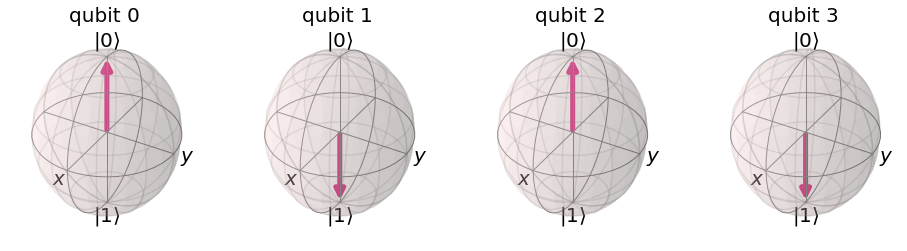

In [7]:
plot_bloch_multivector(s_0.reverse_qargs())

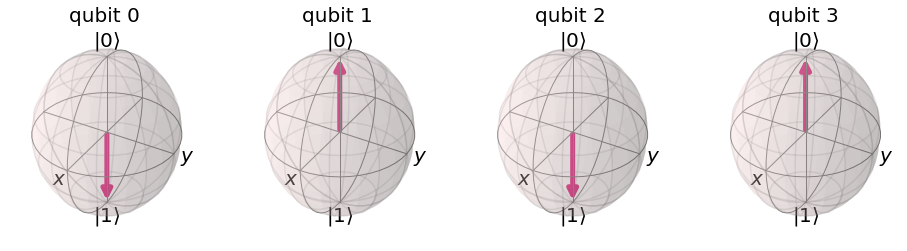

In [8]:
plot_bloch_multivector(s_1.reverse_qargs())

## **Operators of the Quantum Circuit**

### **Initialization of Registers**

In [9]:
def initialize(qc):
    # Equally superimpose all addresses
    qc.h(a)
    
    #d-register is in all-zero state

    #initialize the s-register to one of the searching states(could have done it to the other one also)
    state_to_search=s_0                                                         
    qc.initialize(state_to_search.reverse_qargs(),s)                            # reverse_qargs() - to reverse the order of qubits (to see the result in big-endian convention)

    # initialize the ancilla qubit to the state (|0>-|1>)/sqrt(2)
    qc.x(anc)
    qc.h(anc)

### **Loading of Data**
Based on my reseach, I found :\
Designing unitary operation to
load all information of vector into quantum registers of quantum CPU from classical memory is called quantum loading scheme (QLS).
* First, I have provided an implementation of quantumly accessible classical memory and its loading scheme.   
* Using quantum index helps in loading the data of several indices using superposition.
* Uses qubits of the order `O(log N)`and has time complexity `O(N)`.


In [10]:
# Overall complexity O(2^(n+m))                  

def loadinputs(qc):                                                             # A  ALGORITHM that loads the given classical data into the ∣d⟩ (data) quibits
    for i in range(2**n):
        load_circuit = QuantumCircuit(m, name='LOADING-d_{}'.format(i))
        for j in range(m):
            if vec_in_bits[i][j]=='1':
                load_circuit.x(j)
        load_gate = load_circuit.to_gate()
        # print(circ)
        contload_gate = load_gate.control(n, ctrl_state='{0:0{size}b}'.format(i, size=n)[::-1])                  #reverse bit-string(to see the result in big-endian convention)
        qc.append(contload_gate, range(m+n))

def unloadinputs(qc):                                                     #unloading is required to un-entangle the address and data registers so that we can use grover's algo
    loadinputs(qc)

### **Modified Oracle**

* To compare the d and s registers and mark the states which we are searching.   
* Even though s register consists of only one of the states of the 2 states we are searching, due to their unique relation(and implementation), it is also able to mark the other state.
* Acts as a modified oracle for Grover's algorithm.



In [11]:
# Overall complexity O(m)
def compare(qc):                                                                #compare the s and d registers using cx gates 
    for i in range(m):
        qc.cx(d[i], s[i])


In [12]:
def mark(qc):                                                                                                         #to mark states having d^s=all-0-state and d^s=all-1-state 
    mark1=MCXGate(num_ctrl_qubits=m, ctrl_state='{0:0{size}b}'.format(0, size=m))                                     #only when s and d registers completely match it works
    mark2=MCXGate(num_ctrl_qubits=m, ctrl_state='{0:0{size}b}'.format((2**m-1), size=m))                              #only when s and d registers completely mismatch it works
    qc.append(mark1, range(m+n, 2*m+n+1))
    qc.append(mark2, range(m+n, 2*m+n+1))

In [13]:
def oracle(qc):                                                                 #marks the required states for the grover's algorithm
  compare(qc)
  mark(qc)
  compare(qc)

### **Grover's Diffuser**
Circuit that helps in amplitude amplification in Grover's algorithm.

In [14]:
zero_vector=np.zeros(2**n)                                                      #Operator implementing (2|s><s|-I) for grover's algorithm
zero_vector[0]=1
matrix=2*np.outer(zero_vector, zero_vector)-np.identity(2**n)


def amplifier(qc):
    qc.h(a)
    qc.unitary(Operator(matrix).reverse_qargs(),a,'Amplifier')
    qc.h(a)
    

### **Reset(Optional)**


In [15]:
def reset_s_anc(qc):                                                            # #reset the s-register to |0> state using unitary operators.
  qc_new=QuantumCircuit(m)                                                      #to note that this is not required here as the |s> register remains unchanged 
  number_sv= '{0:0{size}b}'.format(number_0, size=m)                            #and unentagled with other registers.
  for i in range(m):                                                            #done here to visually show the state of the address register easily.
    if(number_sv[i]=='1'):
      qc_new.x(i)
  inv_gate=qc_new.to_gate()
  inv_gate.name= 'Reset s-register'
  qc.append(inv_gate,range(n+m,n+2*m))
  
  # reset ancilla qubit to |0> state
  qc.h(anc)
  qc.x(anc)


## **Final Circuit and Results**

* In accordance to Grover's, we should iterate sqrt(n/#marked) times. As #marked values is not known apriori, we can find it using the QPE(Quantum Phase Estimation) algorithm.
* Also here qubit-0 will always remain unentagled with the other address qubits as it is always 0 while acting as a control while data loading.
* The state-vector is converted to big-endian convection consistent with the bloch sphere result

**Note**: Reseting of the |s> register is optional. Done here to visually show the state of the address register easily.




In [16]:
def final_algo():     

    qc=QuantumCircuit(a, d, s, anc)         # quantum circuit consisting of all qubit registers

    initialize(qc)
    #To get the required indices, this should be iterated sqrt(N/(#marked states)) times(Grover's algorithm)-------------- 
    for i in range(ceil(sqrt(2**n/float(marked)))-1) :
      loadinputs(qc)
      oracle(qc)
      unloadinputs(qc)
      amplifier(qc)
    #but for this case we only need 1 iteration.
    # loadinputs(qc)
    # oracle(qc)
    # unloadinputs(qc)
    # amplifier(qc)
    #---------------------------------------------------------------------------------------------------------------------
    reset_s_anc(qc)

    return qc

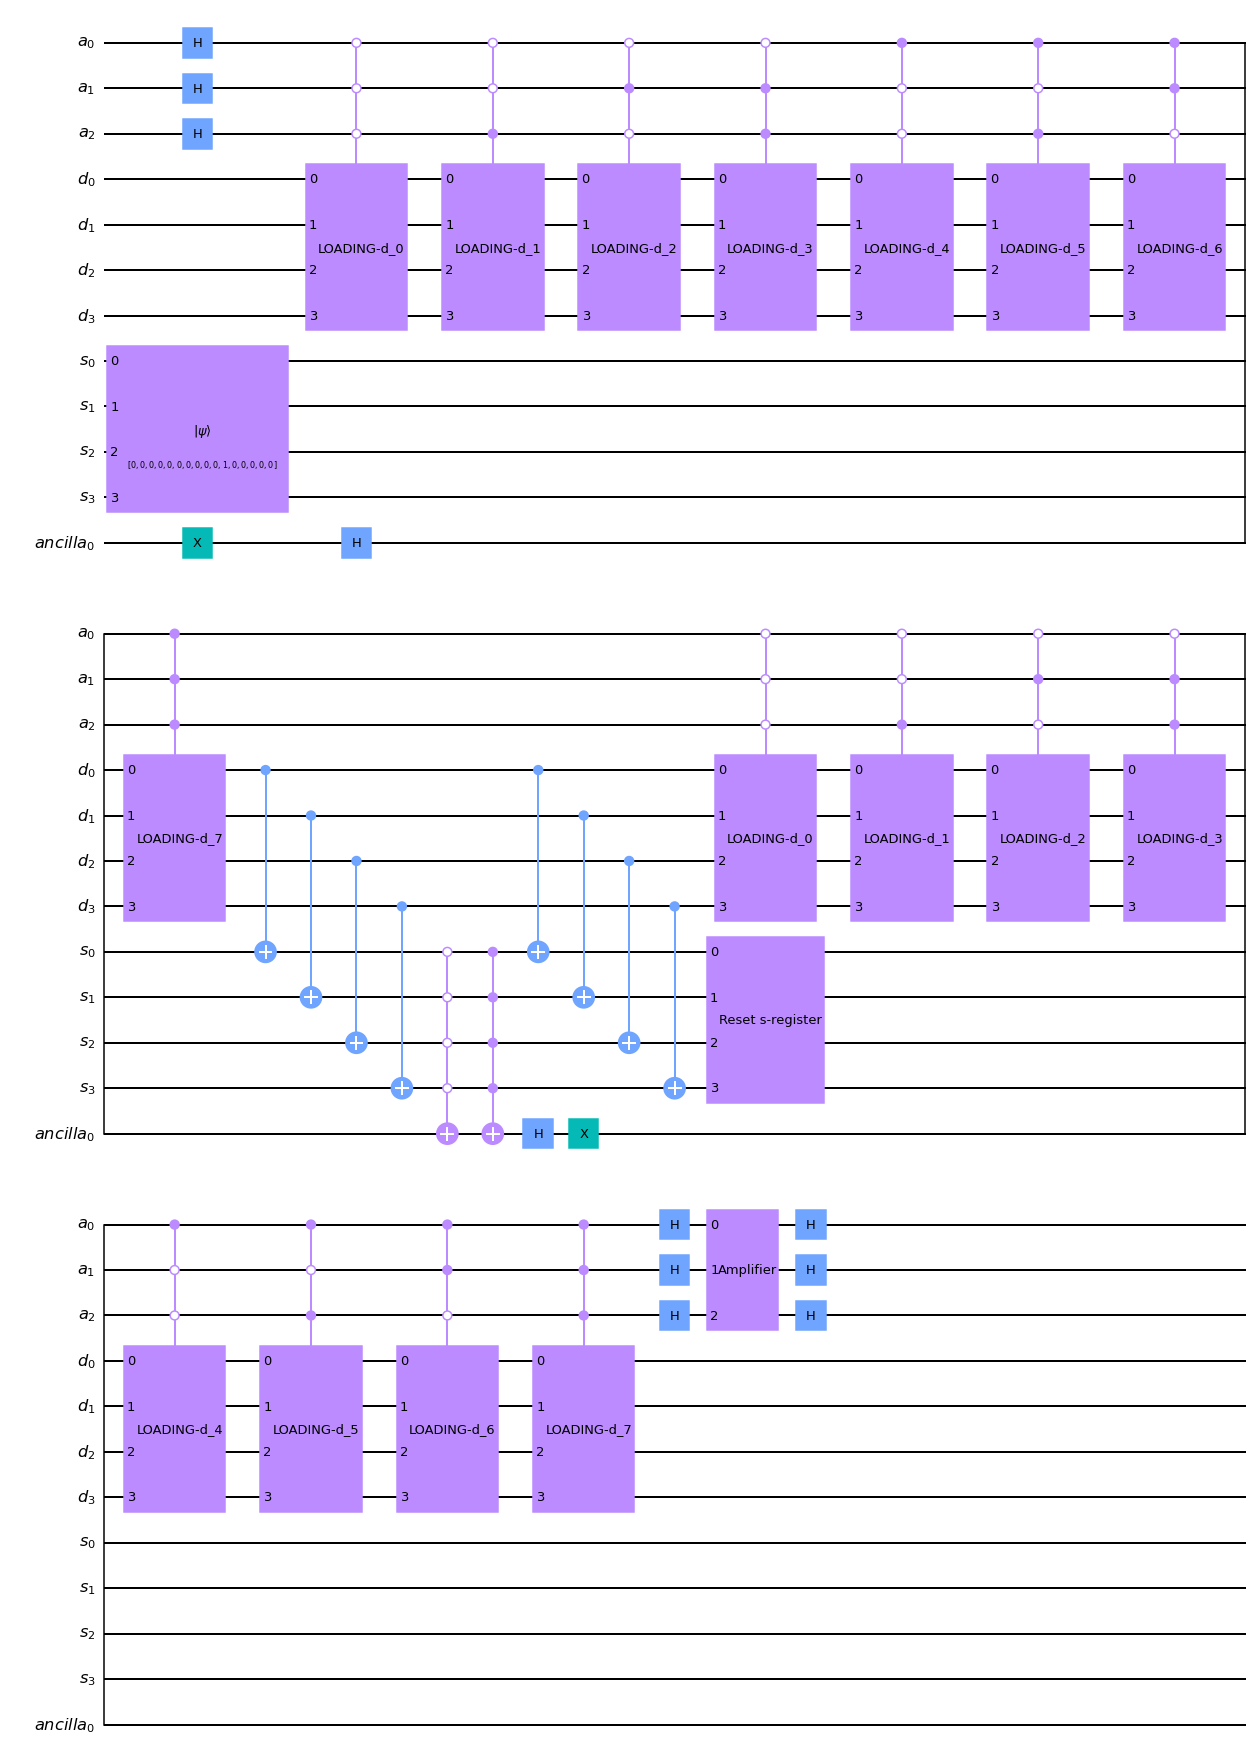

In [17]:
final_circuit_1=final_algo()
display(final_circuit_1.draw(output='mpl'))

In [18]:
cir=final_algo()
state_final = Statevector(cir)
state_final_new = Statevector(state_final.data[:2**n]).reverse_qargs()                  #to show the data of only the address register(this is why we made other registers all 0)
display(array_to_latex(np.array([state_final_new.data[:(2**n)]]).transpose(), prefix="|\\psi\\rangle_{state-final}=",max_size=2**n))


<IPython.core.display.Latex object>

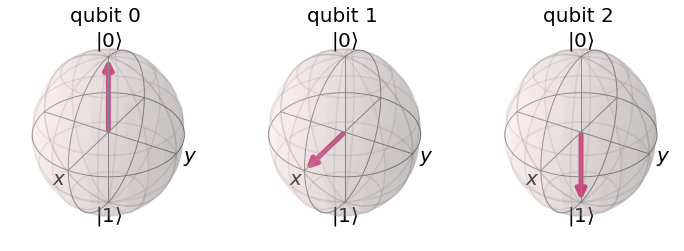

In [19]:
state_final=Statevector(state_final.data[:2**n])
plot_bloch_multivector(state_final)            